# YOLOv5 Instance Segmentation Tutorial

YOLOv5 supports instance segmentation tasks too. This is the official YOLOv5 instance segmentation notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 instance segmentation on COCO-128 Segmentatation
*  [Training YOLOv5 instance segmentation](https://blog.roboflow.com//train-yolov5-instance-segmentation-custom-dataset) on custom data

*Looking for custom data? Explore over 66M community datasets on [Roboflow Universe](https://universe.roboflow.com).*

This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1JTz7kpmHsg-5qwVz2d2IH3AaenI1tv0N?usp=sharing) to run it.

# 0. Setup
Pull in respective libraries to prepare the notebook environment

In [ ]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 60.2MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 137MB/s]

100%|██████████| 42.4M/42.4M [00:00<00:00, 175MB/s]

100%|██████████| 91.9M/91.9M [00:00<00:00, 148MB/s]

100%|██████████| 170M/170M [00:00<00:00, 234MB/s]



# 1. Inference on test image

To demonstrate YOLOv5 instance segmentation, we'll leverage an already trained model. In this case, we'll download the COCO-128 trained models pretrained on COCO-128 using YOLOv5 Utils.

If you'd like to skip to custom trainining, jump to section 3 below.

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 157.2ms
Speed: 2.9ms pre-process, 157.2ms inference, 1194.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/test-inference


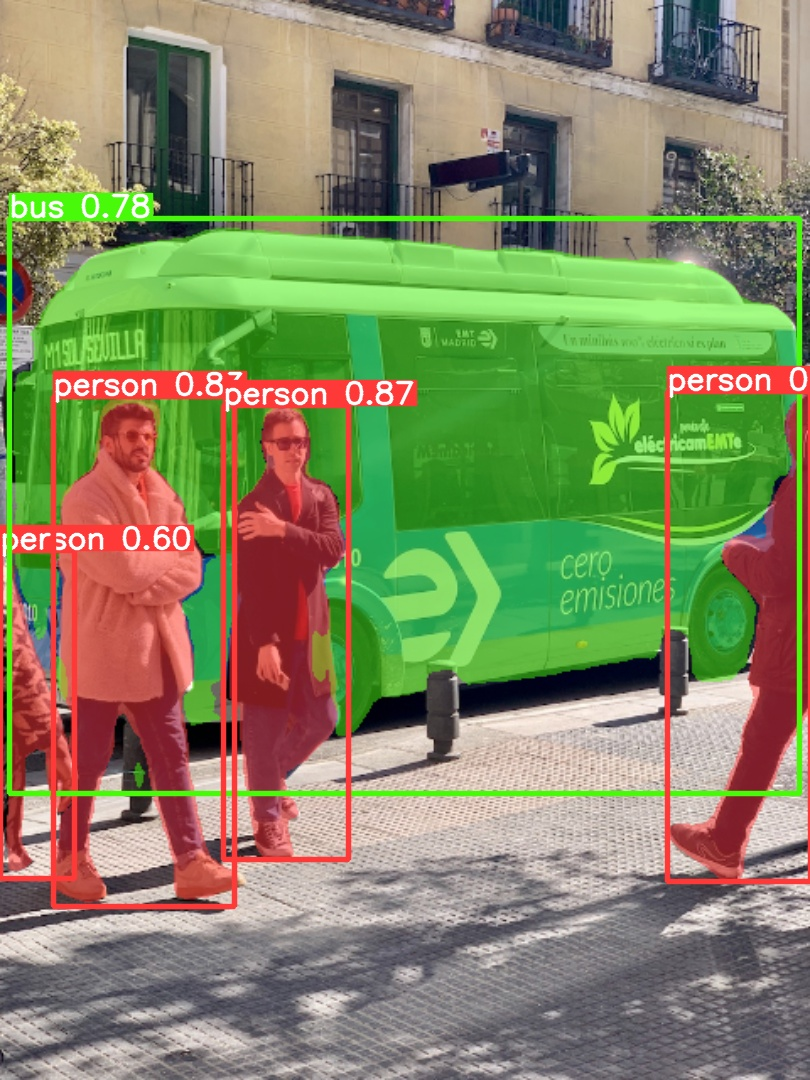

In [ ]:
# infer using segment/predict.py

%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/bus.jpg --name test-inference
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/test-inference/bus.jpg", width=600)

# 2. Infer on COCO image

In [ ]:
#Download example image
import requests
image_url = "https://cdn.mos.cms.futurecdn.net/HjFE8NKWuCmgfHCcndJ3rK-1200-80.jpg"
response = requests.get(image_url)
response.raise_for_status()
with open(f"{HOME}/yolov5/data/images/zebra.jpg", "wb") as handler:
    handler.write(response.content)

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/zebra.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=coco, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/data/images/zebra.jpg: 448x640 1 zebra, 53.9ms
Speed: 0.7ms pre-process, 53.9ms inference, 629.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/coco


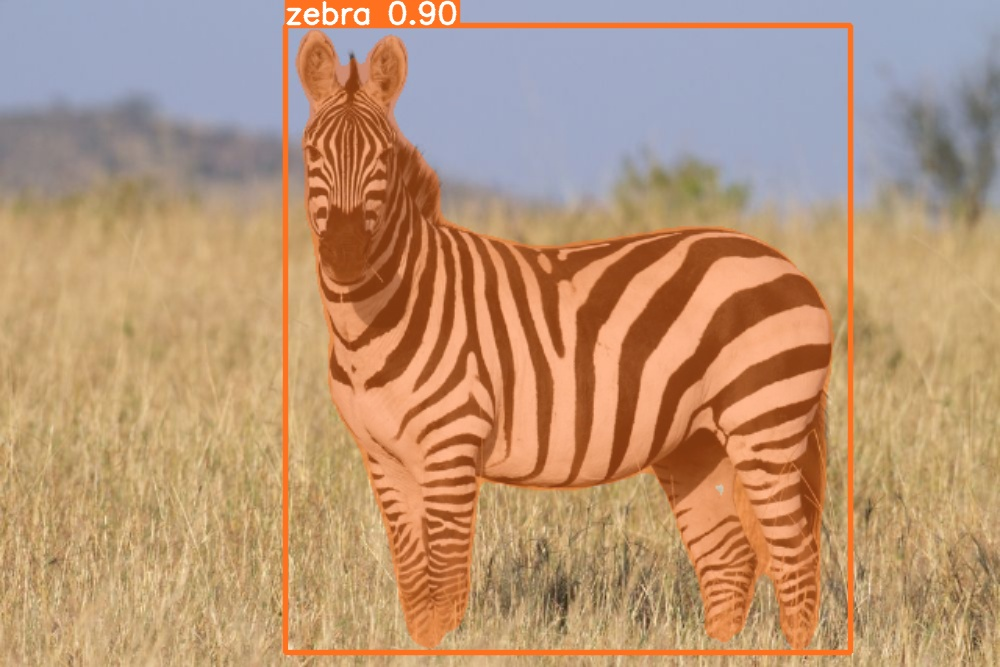

In [ ]:
#Infer using segment/predict.py
%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/zebra.jpg --name coco
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/coco/zebra.jpg", width=600)

## 3. (Optional) Validate

Use the `segment/val.py` script to run validation for the model. This will show us the model's performance.

First, we need to download COCO-128.

In [ ]:
torch.hub.download_url_to_file("https://ultralytics.com/assets/coco128-seg.zip", f"{HOME}/tmp.zip")
!unzip -q {HOME}/tmp.zip -d {HOME}/yolov5/datasets
!rm {HOME}/tmp.zip

100%|██████████| 6.79M/6.79M [00:00<00:00, 201MB/s]


In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights yolov5s-seg.pt --data coco128-seg.yaml --img 640 --name coco

/content/yolov5
segment/val: data=/content/yolov5/data/coco128-seg.yaml, weights=['yolov5s-seg.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=coco, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.9M/14.9M [00:00<00:00, 237MB/s]

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs

Dataset not found ⚠️, missing paths ['/content/datasets/coco128-seg/images/train2017']
100% 6.79M/6.79M [00:00<00:00, 208MB/s]
Dataset download success ✅ (0.9s), saved to /content/datasets
val: Scanning /content/datasets/coco128-seg/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<00:00, 975.32it/s]
val: New cache created: /content/datasets/coco128-s

The output shows performance metrics for the COCO-128 validation dataset.

# 4. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.

To prepare custom data, we'll use [Roboflow](https://roboflow.com). Roboflow enables easy dataset prep with your team, including labeling, formatting into the right export format, deploying, and active learning with a `pip` package.

If you need custom data, there are over 66M open source images from the community on [Roboflow Universe](https://universe.roboflow.com).

(For more guidance, here's a detailed blog on [training YOLOv5 instance segmentation on custom data](https://blog.roboflow.com/train-yolov5-instance-segmentation-custom-dataset).)


Create a free Roboflow account, upload your data, and label.

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-annotation.gif)

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
├── README.roboflow.txt
```

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-format.gif)


Copy and paste that snippet into the cell below.

## Using Fish Dataset for Instance Segmentation

In [ ]:
%cd {HOME}/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="K7rSZ0VWdbj0PgZdxbma")
project = rf.workspace("minor").project("fish_dataset_instance_segmentation")
version = project.version(1)
dataset = version.download("yolov5")

# from roboflow import Roboflow
# # rf = Roboflow(api_key="YOUR API KEY")
# rf = Roboflow(api_key="QL7VElr3am2bTh7OR53z")
# project = rf.workspace("paul-guerrie-tang1").project("asl-poly-instance-seg")
# dataset = project.version(24).download("yolov5")

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninst

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fish_Dataset_Instance_segmentation-1 in yolov5pytorch:: 100%|██████████| 12012/12012 [00:02<00:00, 4714.41it/s]


In [ ]:
%cat {dataset.location}/data.yaml

names:
- Black Sea Sprat
- Gilt-Head Bream
- Red Mullet
- Red Sea Bream
- Shrimp
- Trout
nc: 6
roboflow:
  license: MIT
  project: fish_project
  url: https://universe.roboflow.com/minor/fish_project/dataset/1
  version: 1
  workspace: minor
test: ../test/images
train: Fish_Dataset_Instance_segmentation-1/train/images
val: Fish_Dataset_Instance_segmentation-1/valid/images


### Train On Custom Data 🎉
Here, we use the `dataset.location` attribute to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

In [ ]:
%cd {HOME}/yolov5
!python segment/train.py --img 320 --batch 128 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name custom-dataset

/content/yolov5
2024-03-30 06:55:04.226434: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-30 06:55:04.226487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-30 06:55:04.227820: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/Fish_Dataset_Instance_segmentation-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_sca

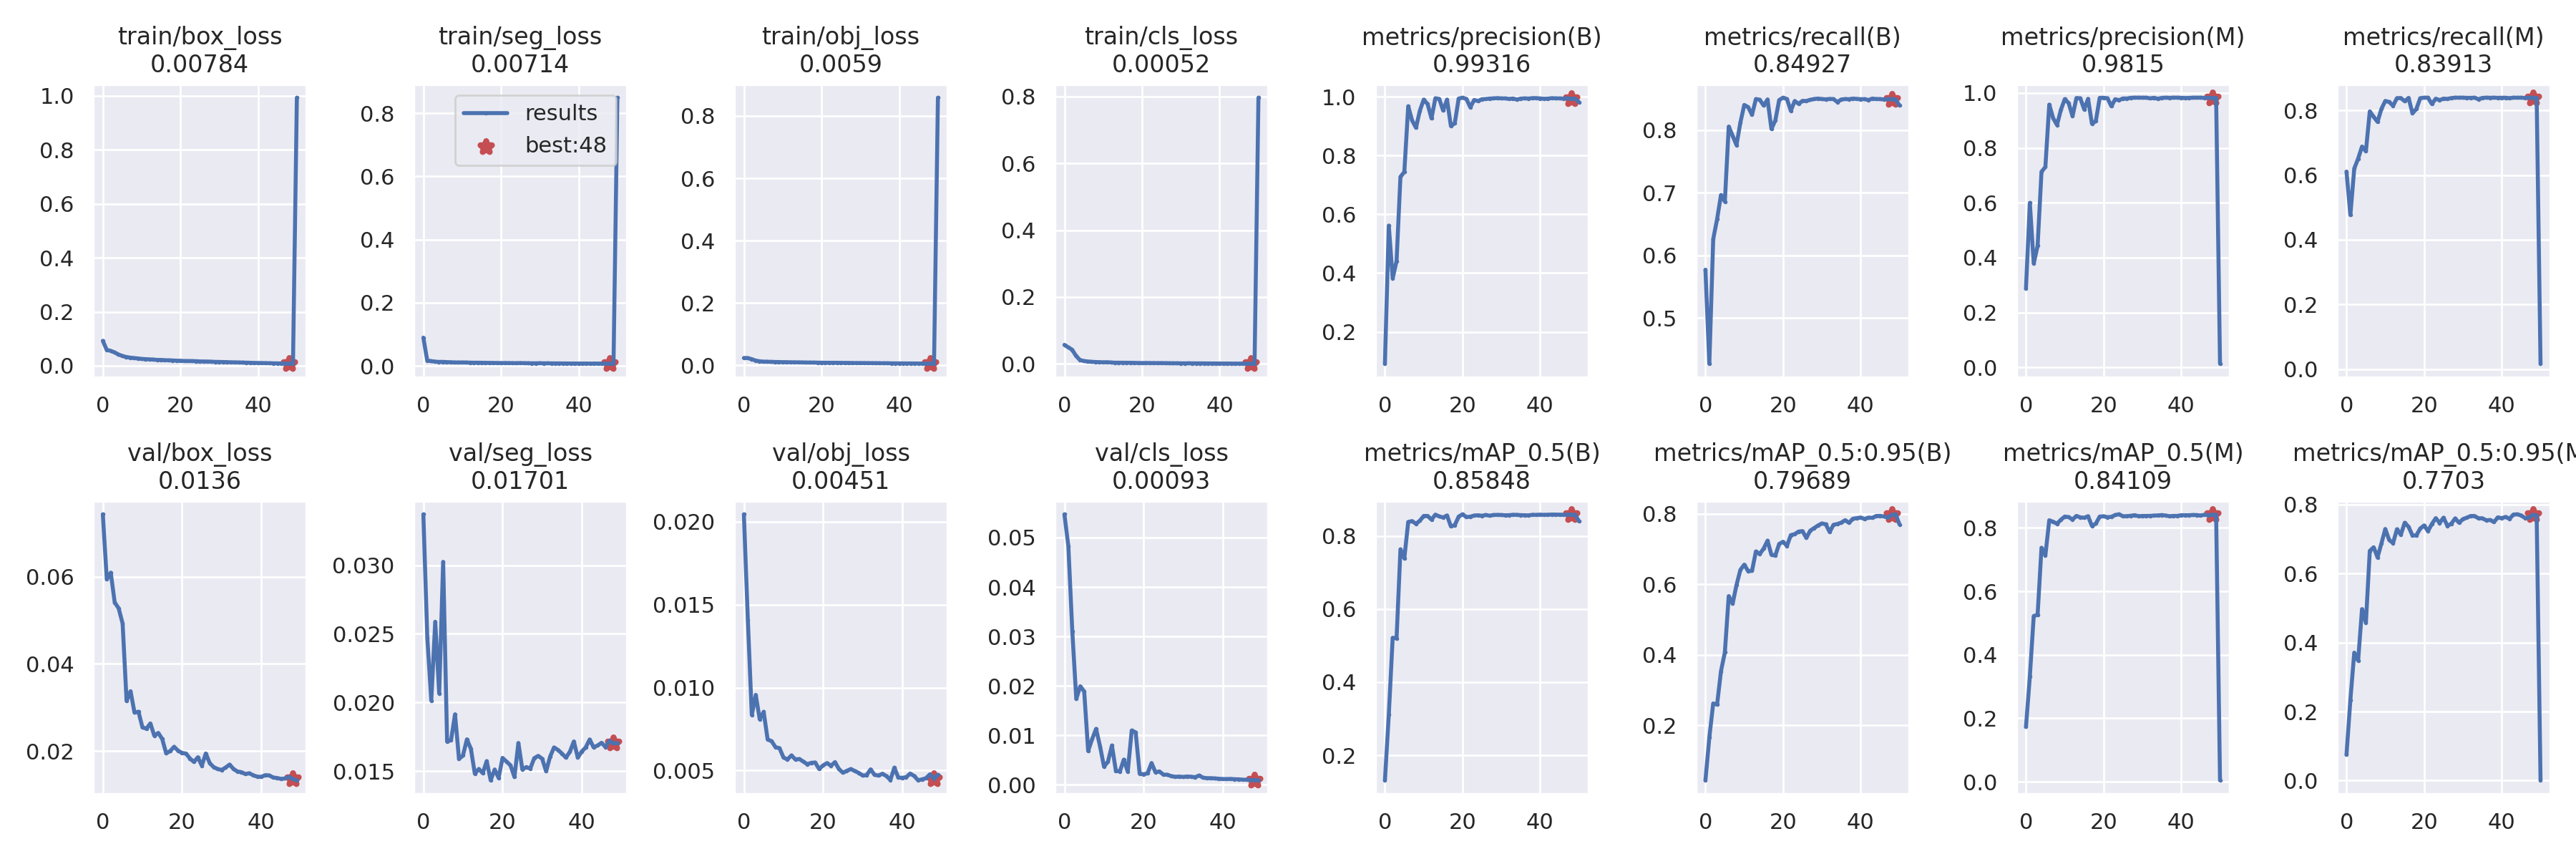

In [ ]:
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset2/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom-dataset

/content/yolov5
segment/val: data=/content/yolov5/Fish_Dataset_Instance_segmentation-1/data.yaml, weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7411907 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/Fish_Dataset_Instance_segmentation-1/valid/labels.cache... 1200 images, 0 backgrounds, 0 corrupt: 100% 1200/1200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 38/38 [00:19<00:00,  1.91it/s]
                

### Infer With Your Custom Model

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=/content/yolov5/Fish_Dataset_Instance_segmentation-1/test/images/4938_png.rf.b1c88bfd62257d2a21281efd28d8f0df.jpg, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7411907 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Fish_Dataset_Instance_segmentation-1/test/images/4938_png.rf.b1c88bfd62257d2a21281efd28d8f0df.jpg: 224x256 1 Trout, 73.1ms
Speed: 0.

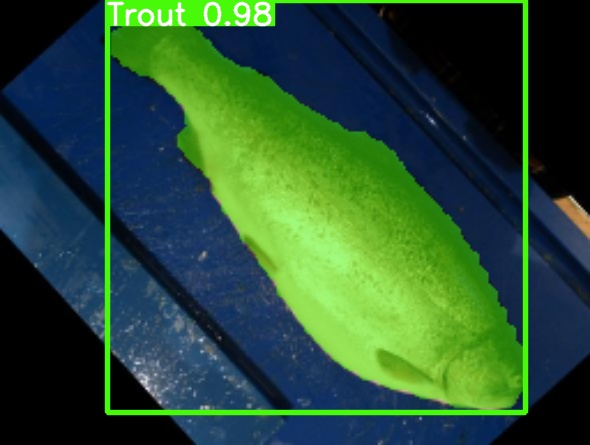

In [ ]:
import os
from IPython.display import Image

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 256 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset/{example_image_name}", width=600)

The image above shows the resulting prediction overlayed on the input image.

## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [ ]:
import os
import requests

#Prepare Our Example Image Directory
#To run on your own images, replace the directory on the line below with a
#directory you provide (by uploading to the colab environment, for example)
example_image_dir = "../example_images"

#We are going to download example images from the web for the purposes of this
#demo. These images are relevant to the ASL Poly dataset. Skip the rest of this
#cell if you are providing your own example image directory.
os.makedirs(example_image_dir, exist_ok=True)
image_urls = [
    "https://source.roboflow.com/W3OqN9O9K2aHqEoSg6rOumuAiiI3/EXQzdu589tcyuHt3mbhq/original.jpg",
    "https://source.roboflow.com/pwYAXv9BTpqLyFfgQoPZ/yscFetAtYicOHTlBQsrZ/original.jpg",
    "https://source.roboflow.com/pwYAXv9BTpqLyFfgQoPZ/6sx8KgQ4EsMYOD3zugkv/thumb.jpg"
    ]

for i, image_url in enumerate(image_urls):
    response = requests.get(image_url)
    response.raise_for_status()
    with open(os.path.join(example_image_dir,f'example_{i}.jpg'), 'wb') as handler:
        handler.write(response.content)

In [ ]:
#Infer On Directory
!python segment/predict.py --img 320 --weights runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['runs/train-seg/custom-dataset2/weights/best.pt'], source=../example_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7411907 parameters, 0 gradients, 25.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/3 /content/example_images/example_0.jpg: 256x320 1 Gilt-Head Bream, 56.5ms
image 2/3 /content/example_images/example_1.jpg: 320x320 2 Gilt-Head Breams, 10.6ms
image 3/3 /content/example_images/example_2.jpg: 320x320 1 Red Mullet, 8.9ms
Speed: 0.3ms 

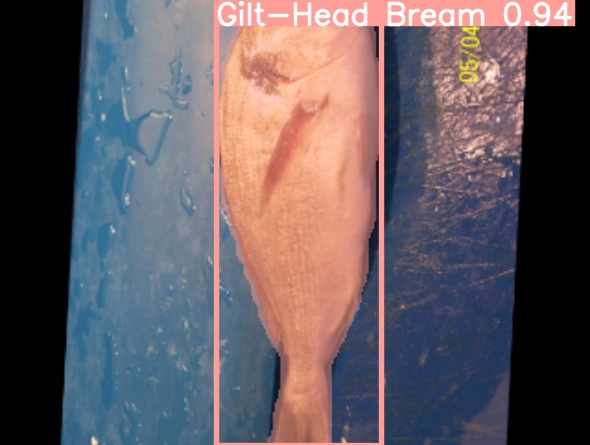

In [ ]:
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/exp4/example_0.jpg", width=600)

In [ ]:
#Read Results Files and Conditionally Upload

#If my model has a confidence of less than 80% for a prediction, let's help it
#out by uploading this image back to our dataset. Then we can add a ground truth
#label to it so that it will be included in our next training run and future
#prediction results will improve.

# Set the minimum confidence threshold
MIN_CONF_THRESHOLD = 0.8

label_dir = "/content/yolov5/runs/predict-seg/exp4/labels"

for txt_file in os.listdir(label_dir):
    with open(os.path.join(label_dir, txt_file), 'r') as fid:
        for line in fid:
            parts = line.strip().split(" ")

            if len(parts) >= 6:
                label, *coords, conf = parts
                conf = float(conf)

                if conf < MIN_CONF_THRESHOLD:
                    print(f"Image has a low confidence prediction, uploading to project: {txt_file}")

                    gt = f"runs/predict-seg/exp4/labels/{txt_file}"
                    with open(gt, 'w') as gt_fid:
                        gt_fid.write(" ".join(parts[:-1]))
            break

Image has a low confidence prediction, uploading to project: example_2.txt
Image has a low confidence prediction, uploading to project: example_1.txt


## Conclusion

The custom data that I have used for this activity is the Fish Dataset. So it consists of 6000 images wherein 70% are for training, 20% for validation, and the rest for testing. It has 6 classes which are Black Sea Sprat, Gilt-Head Bream, Red Mullet, Red Sea Bream, Shrimp, and Trout. I decided to train it with 50 epochs only because when I tried to first train with 100 epochs, the losses plateaud at around 40 epochs. It took about 2 hours for the training to finish.

In evaluating YOLOv5 models, the key metrics are found in the "Box" section. This includes precision (P), which measures detection accuracy, and recall (R), which gauges detection completeness. Mean average precision at an IoU threshold of 0.5 (mAP50) and mean average precision across IoU thresholds from 0.5 to 0.95 (mAP50-95) provide overall performance assessments, indicating accuracy levels at different overlap thresholds. These metrics collectively help gauge how well YOLOv5 models can accurately detect objects in images.

As for the results, for all classes combined (denoted as "all"), the model achieves a precision (P) of 0.993, recall (R) of 0.849, mean average precision at an IoU threshold of 0.5 (mAP50) of 0.859, and mean average precision across IoU thresholds from 0.5 to 0.95 (mAP50-95) of 0.797 for bounding box predictions. Some classes, like Gilt-Head Bream and Red Sea Bream, show excellent performance, while others, such as Red Mullet and Shrimp, have room for improvement. Inference speed is fast at 2.3ms per image. I can say that while the model is strong, some classes could be refined for better results.

Since active learning improves model performance by selecting the most informative data points for annotation, I used the provided code and searched the web to find three different fish photos for the model to test on. Out of these three, the output indicates that only two images have low-confidence predictions, as seen in the output of example_0.jpg which is a gilt-head bream, prompting them to be uploaded back for additional annotation to enhance the model's performance.